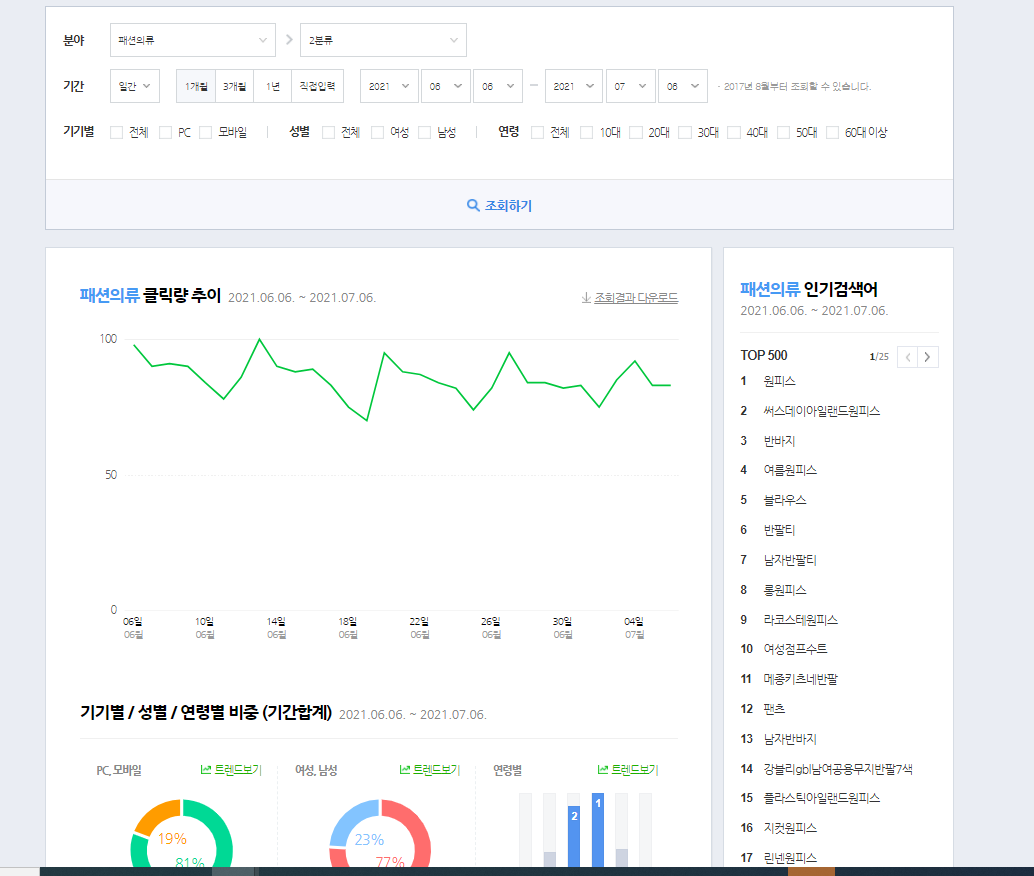

In [2]:
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import threading
import time
from datetime import datetime, timedelta
import xlsxwriter
import re


driver = webdriver.Chrome()
# 객체 생성 

driver.implicitly_wait(2)

# 쇼핑인사이트 이동
path = 'https://datalab.naver.com/shoppingInsight/sCategory.naver'
driver.get(path)

# 기간 1년 설정
# 사실은 직접 기간에 텍스트 입력을 바꿔가면서 월별로 데이터 프레임을 저장해보고 싶었지만
# 능력 부족으로 실패했습니다....!! 효석님 같이 고민해주시면 너무너무 감사할 것 같아요 ...ㅎ

driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/div/div/div[2]/div[1]/span/label[3]').click()
# 기기별 전체 선택
driver.find_element_by_xpath('//*[@id="18_device_0"]').click()
# 성별 전체 선택
driver.find_element_by_xpath('//*[@id="19_gender_0"]').click()
# 연령별 전체 선택
driver.find_element_by_xpath('//*[@id="20_age_0"]').click()

try : 
    # 타임 슬립 10초간 
    time.sleep(10)


    # 조회하기 클릭
    driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[1]/div/a').click()
    time.sleep(3)


    keyword_list = []

    for p in range(0, 25):
        # 인기검색어 가져오기
        # 0은 오류가 난다.
        for i in range(1, 21):
            keyword_path = f'//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[1]/ul/li[{i}]/a'
            keyword_list.append(driver.find_element_by_xpath(keyword_path).text)

        # 다음 페이지 넘기기 
        driver.find_element_by_xpath('//*[@id="content"]/div[2]/div/div[2]/div[2]/div/div/div[2]/div/a[2]').click()
        time.sleep(1)

except : 
    print("크롤링 중 오류 발생")
    driver.close()
    



# 종료하기
driver.close()

In [3]:
import pandas as pd

df = pd.DataFrame(list(map((lambda x : x.split('\n')), keyword_list)), columns = ['순위', '인기검색어'])

df

,순위,인기검색어
0,1,원피스
1,2,써스데이아일랜드원피스
2,3,블라우스
3,4,롱원피스
4,5,트위드자켓
...,...,...
495,496,캐시미어니트
496,497,핸드메이드자켓
497,498,휠라후리스
498,499,폴로카라티


크롤링 실습에 치중해보았습니다!

위의 코드는 패션의류 카테고리 내 1년간의 인기검색어 순위를 25페이지까지 크롤링해와서 df화 시켜본 코드입니다. 

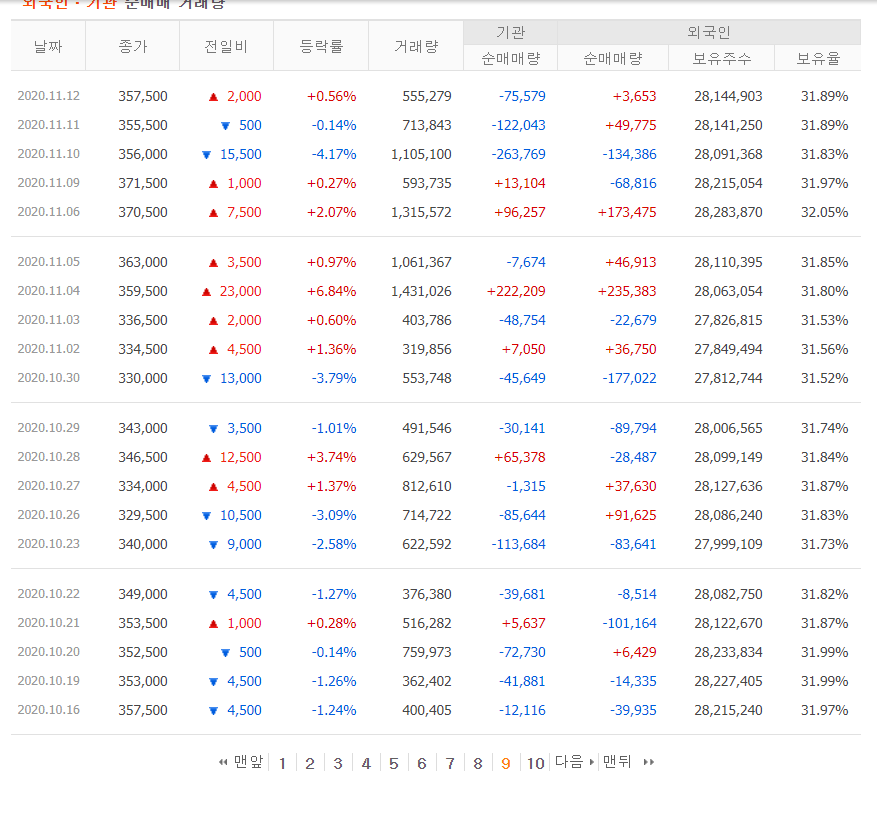

In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup
from datetime import datetime
import threading
import time
from datetime import datetime, timedelta
import xlsxwriter
import re
from random import *


driver = webdriver.Chrome()
# 객체 생성 

driver.implicitly_wait(2)

# 네이버 증권 내 카카오 증권 사이트 이동

path = 'https://finance.naver.com/item/frgn.nhn?code=035720'
driver.get(path)



keyword_list = []

try:
    for p in range(2, 12):

        # 주가 정보 가져오기
        # 0,1 은 쓸모 없는 정보 / 나중에 칼럼 형성 예정.
        for i in range(4, 21):
            keyword_path = f'//*[@id="content"]/div[2]/table[1]/tbody/tr[{i}]'
            keyword_list.append(driver.find_element_by_xpath(keyword_path).text)

        # 2~12 다음 페이지 넘기기 
        driver.find_element_by_xpath(f'//*[@id="content"]/div[2]/table[2]/tbody/tr/td[{p}]/a').click()
        time.sleep(uniform(0,1))
        
except :
    print("크롤링 중 오류 발생")
    driver.close()

    
#     //*[@id="content"]/div[2]/table[2]/tbody/tr/td[1]/a
#     //*[@id="content"]/div[2]/table[2]/tbody/tr/td[2]/a
#     //*[@id="content"]/div[2]/table[2]/tbody/tr/td[3]/a
# # //*[@id="content"]/div[2]/table[2]/tbody/tr/td[11]/a
# //*[@id="content"]/div[2]/table[1]/tbody/tr[4]/td[1]/span

In [11]:
thing = ''

try:
    while thing in keyword_list: keyword_list.remove(thing)    
except:
    print(None)

# 크롤링을 하다보면 '' 원소가 포함되어 나중에 데이터 프레임 생성 시 리스트 길이가 달라 데이터프레임 형성에 방해가 된다.

print(keyword_list)

['2021.07.07 161,000 3,500 +2.22% 4,413,394 +102,023 +689,249 142,902,513 32.19%', '2021.07.06 157,500 500 +0.32% 2,045,164 -46,744 +53,560 142,183,264 32.03%', '2021.07.05 157,000 2,500 -1.57% 4,506,967 -257,418 -182,938 142,129,704 32.02%', '2021.07.02 159,500 500 -0.31% 4,407,703 +13,928 +31,518 142,662,943 32.14%', '2021.07.01 160,000 3,000 -1.84% 4,630,280 -282,424 -551,545 142,645,425 32.13%', '2021.06.30 163,000 5,000 +3.16% 7,305,590 +181,306 -506,594 143,006,970 32.21%', '2021.06.29 158,000 3,000 +1.94% 3,938,542 -104,792 +63,118 143,404,263 32.30%', '2021.06.28 155,000 500 +0.32% 5,141,409 -176,028 -545,704 142,852,270 32.18%', '2021.06.25 154,500 2,500 -1.59% 12,271,446 -30,129 -574,488 143,083,974 32.23%', '2021.06.24 157,000 12,500 -7.37% 18,408,195 -932,909 -1,817,095 143,833,762 32.40%', '2021.06.23 169,500 10,500 +6.60% 9,078,797 -179,393 -71,955 145,498,675 32.78%', '2021.06.09 129,000 500 +0.39% 1,936,747 +55,847 +271,362 148,008,974 33.35%', '2021.06.08 128,500 2,500

In [12]:
len(keyword_list)

110

In [14]:
keyword_list

['2021.07.07 161,000 3,500 +2.22% 4,413,394 +102,023 +689,249 142,902,513 32.19%',
 '2021.07.06 157,500 500 +0.32% 2,045,164 -46,744 +53,560 142,183,264 32.03%',
 '2021.07.05 157,000 2,500 -1.57% 4,506,967 -257,418 -182,938 142,129,704 32.02%',
 '2021.07.02 159,500 500 -0.31% 4,407,703 +13,928 +31,518 142,662,943 32.14%',
 '2021.07.01 160,000 3,000 -1.84% 4,630,280 -282,424 -551,545 142,645,425 32.13%',
 '2021.06.30 163,000 5,000 +3.16% 7,305,590 +181,306 -506,594 143,006,970 32.21%',
 '2021.06.29 158,000 3,000 +1.94% 3,938,542 -104,792 +63,118 143,404,263 32.30%',
 '2021.06.28 155,000 500 +0.32% 5,141,409 -176,028 -545,704 142,852,270 32.18%',
 '2021.06.25 154,500 2,500 -1.59% 12,271,446 -30,129 -574,488 143,083,974 32.23%',
 '2021.06.24 157,000 12,500 -7.37% 18,408,195 -932,909 -1,817,095 143,833,762 32.40%',
 '2021.06.23 169,500 10,500 +6.60% 9,078,797 -179,393 -71,955 145,498,675 32.78%',
 '2021.06.09 129,000 500 +0.39% 1,936,747 +55,847 +271,362 148,008,974 33.35%',
 '2021.06.08 1

In [15]:
stock = {}
for i in range(len(keyword_list)):
    stock[i] = keyword_list[i].split(' ')

    
print(stock)

{0: ['2021.07.07', '161,000', '3,500', '+2.22%', '4,413,394', '+102,023', '+689,249', '142,902,513', '32.19%'], 1: ['2021.07.06', '157,500', '500', '+0.32%', '2,045,164', '-46,744', '+53,560', '142,183,264', '32.03%'], 2: ['2021.07.05', '157,000', '2,500', '-1.57%', '4,506,967', '-257,418', '-182,938', '142,129,704', '32.02%'], 3: ['2021.07.02', '159,500', '500', '-0.31%', '4,407,703', '+13,928', '+31,518', '142,662,943', '32.14%'], 4: ['2021.07.01', '160,000', '3,000', '-1.84%', '4,630,280', '-282,424', '-551,545', '142,645,425', '32.13%'], 5: ['2021.06.30', '163,000', '5,000', '+3.16%', '7,305,590', '+181,306', '-506,594', '143,006,970', '32.21%'], 6: ['2021.06.29', '158,000', '3,000', '+1.94%', '3,938,542', '-104,792', '+63,118', '143,404,263', '32.30%'], 7: ['2021.06.28', '155,000', '500', '+0.32%', '5,141,409', '-176,028', '-545,704', '142,852,270', '32.18%'], 8: ['2021.06.25', '154,500', '2,500', '-1.59%', '12,271,446', '-30,129', '-574,488', '143,083,974', '32.23%'], 9: ['2021.0

In [16]:
import pandas as pd

df = pd.DataFrame(stock).transpose()

df.columns = ['날짜','종가','전일비','등락률','거래량','기관순매매량','외국인순매매량','외국인보유주수','외국인보유율']

df

,날짜,종가,전일비,등락률,거래량,기관순매매량,외국인순매매량,외국인보유주수,외국인보유율
0,2021.07.07,"161,000","3,500",+2.22%,"4,413,394","+102,023","+689,249","142,902,513",32.19%
1,2021.07.06,"157,500",500,+0.32%,"2,045,164","-46,744","+53,560","142,183,264",32.03%
2,2021.07.05,"157,000","2,500",-1.57%,"4,506,967","-257,418","-182,938","142,129,704",32.02%
3,2021.07.02,"159,500",500,-0.31%,"4,407,703","+13,928","+31,518","142,662,943",32.14%
4,2021.07.01,"160,000","3,000",-1.84%,"4,630,280","-282,424","-551,545","142,645,425",32.13%
...,...,...,...,...,...,...,...,...,...
105,2020.11.05,"363,000","3,500",+0.97%,"1,061,367","-7,674","+46,913","28,110,395",31.85%
106,2020.11.04,"359,500","23,000",+6.84%,"1,431,026","+222,209","+235,383","28,063,054",31.80%
107,2020.11.03,"336,500","2,000",+0.60%,"403,786","-48,754","-22,679","27,826,815",31.53%
108,2020.11.02,"334,500","4,500",+1.36%,"319,856","+7,050","+36,750","27,849,494",31.56%


In [17]:
df = df.loc[::-1].reset_index(drop = True)
df

,날짜,종가,전일비,등락률,거래량,기관순매매량,외국인순매매량,외국인보유주수,외국인보유율
0,2020.10.30,"330,000","13,000",-3.79%,"553,748","-45,649","-177,022","27,812,744",31.52%
1,2020.11.02,"334,500","4,500",+1.36%,"319,856","+7,050","+36,750","27,849,494",31.56%
2,2020.11.03,"336,500","2,000",+0.60%,"403,786","-48,754","-22,679","27,826,815",31.53%
3,2020.11.04,"359,500","23,000",+6.84%,"1,431,026","+222,209","+235,383","28,063,054",31.80%
4,2020.11.05,"363,000","3,500",+0.97%,"1,061,367","-7,674","+46,913","28,110,395",31.85%
...,...,...,...,...,...,...,...,...,...
105,2021.07.01,"160,000","3,000",-1.84%,"4,630,280","-282,424","-551,545","142,645,425",32.13%
106,2021.07.02,"159,500",500,-0.31%,"4,407,703","+13,928","+31,518","142,662,943",32.14%
107,2021.07.05,"157,000","2,500",-1.57%,"4,506,967","-257,418","-182,938","142,129,704",32.02%
108,2021.07.06,"157,500",500,+0.32%,"2,045,164","-46,744","+53,560","142,183,264",32.03%


In [18]:
for col in df.columns : 
    if ',' in df[col][0]:
        df[col] = df[col].str.replace(',', '').astype('float')
    elif '%' in df[col][0]:
        df[col] = df[col].str.replace('%', '').astype('float')
        df[col] = df[col].apply(lambda x: x/100)
    else :
        df[col] = df[col].str.replace('.', '/')
        df['날짜'] =  pd.to_datetime(df['날짜'], format='%Y/%m/%d')

In [19]:
df=df.set_index(['날짜'])

In [20]:
df.head()

,종가,전일비,등락률,거래량,기관순매매량,외국인순매매량,외국인보유주수,외국인보유율
날짜,,,,,,,,
2020-10-30,330000.0,13000.0,-0.0379,553748.0,-45649.0,-177022.0,27812744.0,0.3152
2020-11-02,334500.0,4500.0,0.0136,319856.0,7050.0,36750.0,27849494.0,0.3156
2020-11-03,336500.0,2000.0,0.0060,403786.0,-48754.0,-22679.0,27826815.0,0.3153
2020-11-04,359500.0,23000.0,0.0684,1431026.0,222209.0,235383.0,28063054.0,0.3180
2020-11-05,363000.0,3500.0,0.0097,1061367.0,-7674.0,46913.0,28110395.0,0.3185


In [21]:
df.index

DatetimeIndex(['2020-10-30', '2020-11-02', '2020-11-03', '2020-11-04',
               '2020-11-05', '2020-11-06', '2020-11-09', '2020-11-10',
               '2020-11-11', '2020-11-12',
               ...
               '2021-06-24', '2021-06-25', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01', '2021-07-02', '2021-07-05',
               '2021-07-06', '2021-07-07'],
              dtype='datetime64[ns]', name='날짜', length=110, freq=None)

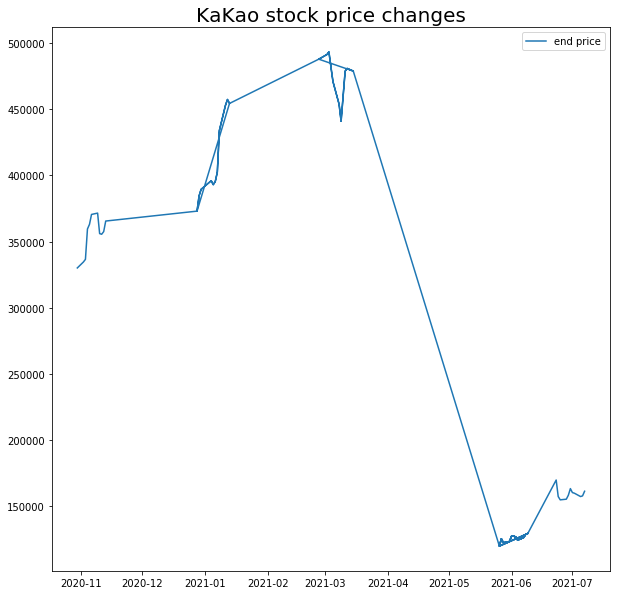

In [22]:
# imports the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.font_manager as fm
%matplotlib inline

import statsmodels.formula.api as smf


font_path = r'./NanumSquareB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df['종가']) ## 선그래프 생성 
plt.legend(['end price'])

plt.title('KaKao stock price changes',fontsize=20) ## 타이틀 설정
plt.show()

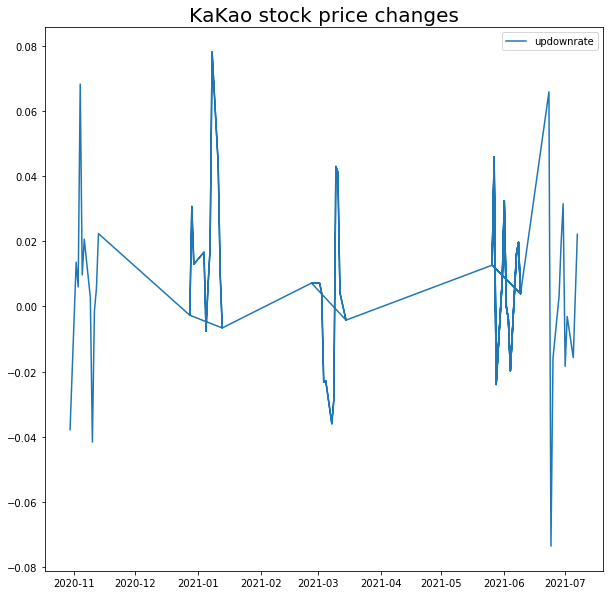

In [23]:
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df['등락률']) ## 선그래프 생성 
plt.legend(['updownrate'])

plt.title('KaKao stock price changes',fontsize=20) ## 타이틀 설정
plt.show()

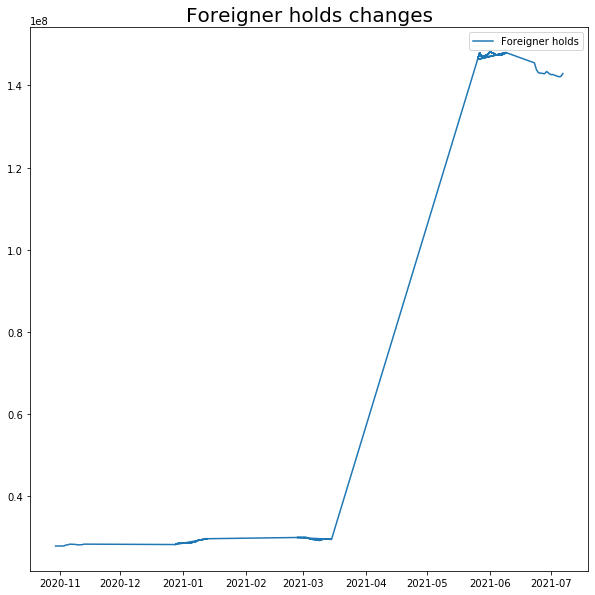

In [24]:
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성
 
ax.plot(df['외국인보유주수']) ## 선그래프 생성 
plt.legend(['Foreigner holds'])

plt.title('Foreigner holds changes',fontsize=20) ## 타이틀 설정
plt.show()